## What is Cryptocurrency?

A cryptocurrency (or “crypto”) is a form of payment that can circulate without the need for a central monetary authority such as a government or bank. Instead, cryptocurrencies are created using cryptographic techniques that enable people to buy, sell or trade them securely.

### Context
The dataset contains all historical daily prices (open, high, low, close) for the top 50 Cryptocurrency

### Content
The dataset has 50 different CSV files for each of the top 50 cryptocurrencies. Price history is available on a daily basis from the launch of that respective cryptocurrency. The dataset also contains an ALL_COMBINED CSV file, which contains the combined data for all the TOP50 cryptocurrencies in one CSV file.
Attribute Information:

SNo: Serial Number 
Date: Date of observation
Price: Price on the given day (Also the closing price for that day)
Open: Opening price on the given day
High: Highest price on the given day
Low: Lowest price on the given day
Volume: Volume of transactions on the given day
Change%: Percentage Change from the previous day

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/top-50-cryptocurrency-historical-prices/Monero.csv
/kaggle/input/top-50-cryptocurrency-historical-prices/FTX_Token.csv
/kaggle/input/top-50-cryptocurrency-historical-prices/Tron.csv
/kaggle/input/top-50-cryptocurrency-historical-prices/LEO.csv
/kaggle/input/top-50-cryptocurrency-historical-prices/Tezos.csv
/kaggle/input/top-50-cryptocurrency-historical-prices/BitTorrent.csv
/kaggle/input/top-50-cryptocurrency-historical-prices/Waves.csv
/kaggle/input/top-50-cryptocurrency-historical-prices/WBTC.csv
/kaggle/input/top-50-cryptocurrency-historical-prices/XPR.csv
/kaggle/input/top-50-cryptocurrency-historical-prices/Axie_Infinity.csv
/kaggle/input/top-50-cryptocurrency-historical-prices/Dogecoin.csv
/kaggle/input/top-50-cryptocurrency-historical-prices/Klaytn.csv
/kaggle/input/top-50-cryptocurrency-historical-prices/Bitcoin_Cash.csv
/kaggle/input/top-50-cryptocurrency-historical-prices/Ethereum.csv
/kaggle/input/top-50-cryptocurrency-historical-prices/Cosmos.csv
/kaggle/input

## Importing the Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from pandas_profiling import ProfileReport
from statsmodels.tsa.stattools import adfuller
from numpy import log
from warnings import filterwarnings
filterwarnings('ignore')

## Importing the Dataset (Combined)

In [3]:
dataset_all = pd.read_csv('/kaggle/input/top-50-cryptocurrency-historical-prices/All_combined.csv')
dataset_all.head()

Currency_Name        Date  Price  Open  High   Low       Vol.  Change %
0          Aave  2018-01-30   0.15  0.17  0.17  0.14   530470.0     -7.95
1          Aave  2018-01-31   0.14  0.15  0.15  0.13   396050.0    -11.10
2          Aave  2018-02-01   0.11  0.14  0.14  0.11   987260.0    -17.46
3          Aave  2018-02-02   0.10  0.11  0.11  0.08  1810000.0     -8.32
4          Aave  2018-02-03   0.11  0.10  0.12  0.09  1200000.0      6.85

## Exploratory Data Analysis on the Combined Dataset

In [4]:
dataset_all['Year'] = pd.DatetimeIndex(dataset_all['Date']).year
dataset_all.head()

Currency_Name        Date  Price  Open  High   Low       Vol.  Change %  \
0          Aave  2018-01-30   0.15  0.17  0.17  0.14   530470.0     -7.95   
1          Aave  2018-01-31   0.14  0.15  0.15  0.13   396050.0    -11.10   
2          Aave  2018-02-01   0.11  0.14  0.14  0.11   987260.0    -17.46   
3          Aave  2018-02-02   0.10  0.11  0.11  0.08  1810000.0     -8.32   
4          Aave  2018-02-03   0.11  0.10  0.12  0.09  1200000.0      6.85   

   Year  
0  2018  
1  2018  
2  2018  
3  2018  
4  2018

In [5]:
temp = dataset_all.groupby(['Currency_Name', 'Year'])['Price'].mean()
temp = temp.reset_index()
cryptos = temp['Currency_Name'].unique()
for crypto in cryptos:
    data = temp[['Price','Year']][temp['Currency_Name'] == crypto]
    fig = px.line(data, x = 'Year', y = 'Price', title = f"{crypto}'s Price",
                 labels = {'Price': 'Price'})
    fig.show()

In [6]:
data_top = dataset_all[dataset_all['Currency_Name'].isin(['Bitcoin', 'Ethereum', 'Tether', 'Solana', 'Binance_Coin'])]
x = data_top.groupby(['Currency_Name', 'Year'])['High'].mean()
x = x.reset_index()

px.scatter(x, x = "Year", y = "High", animation_frame = "Year", animation_group = "Currency_Name",
           size = "High", color = "Currency_Name", hover_name = "Currency_Name", size_max = 100, 
           range_x = [2010, 2021], range_y = [0, 50000])

## Bitcoin Predictive Analysis

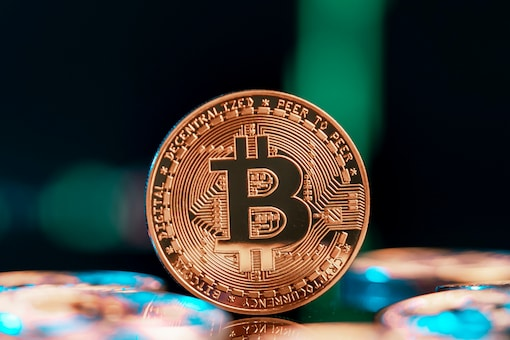


### What is Bitcoin?
Bitcoin is a decentralized digital currency, without a central bank or single administrator, that can be sent from user to user on the peer-to-peer bitcoin network without the need for intermediaries.

## Importing the Dataset

In [7]:
dataset = pd.read_csv('/kaggle/input/top-50-cryptocurrency-historical-prices/Bitcoin.csv')
dataset.head()

SNo        Date  Price  Open  High  Low    Vol.  Change %
0    1  2010-07-18    0.1   0.0   0.1  0.1    80.0       0.0
1    2  2010-07-19    0.1   0.1   0.1  0.1   570.0       0.0
2    3  2010-07-20    0.1   0.1   0.1  0.1   260.0       0.0
3    4  2010-07-21    0.1   0.1   0.1  0.1   580.0       0.0
4    5  2010-07-22    0.1   0.1   0.1  0.1  2160.0       0.0

## Basic Data Wrangling

In [8]:
dataset.describe(include = 'all')

SNo        Date         Price          Open          High  \
count   4056.000000        4056   4056.000000   4056.000000   4056.000000   
unique          NaN        4056           NaN           NaN           NaN   
top             NaN  2010-07-18           NaN           NaN           NaN   
freq            NaN           1           NaN           NaN           NaN   
mean    2028.500000         NaN   5422.154586   5409.912081   5575.478526   
std     1171.010675         NaN  10817.808737  10795.756471  11141.061147   
min        1.000000         NaN      0.100000      0.000000      0.100000   
25%     1014.750000         NaN     95.075000     94.925000     99.750000   
50%     2028.500000         NaN    591.400000    591.050000    602.500000   
75%     3042.250000         NaN   7120.200000   7116.450000   7330.250000   
max     4056.000000         NaN  63540.900000  63544.200000  64778.000000   

                 Low          Vol.     Change %  
count    4056.000000  4.056000e+03  4056.000000  
unique           NaN           NaN          NaN  
top              NaN           NaN          NaN  
freq             NaN           NaN          NaN  
mean     5227.333703  2.927631e+05     0.494423  
std     10406.451635  9.833814e+05     7.739525  
min         0.000000  0.000000e+00   -57.210000  
25%        90.700000  2.713750e+04    -1.170000  
50%       580.750000  6.522000e+04     0.000000  
75%      6889.200000  1.710725e+05     1.910000  
max     62067.500000  2.026000e+07   336.840000

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4056 entries, 0 to 4055
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SNo       4056 non-null   int64  
 1   Date      4056 non-null   object 
 2   Price     4056 non-null   float64
 3   Open      4056 non-null   float64
 4   High      4056 non-null   float64
 5   Low       4056 non-null   float64
 6   Vol.      4056 non-null   float64
 7   Change %  4056 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 253.6+ KB


In [10]:
dataset.isnull().sum()

SNo         0
Date        0
Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64

## Pandas Profiling

In [11]:
profile = ProfileReport(dataset, title = "Pandas Profiling Report")
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/21 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Exploratory Data Analysis

In [12]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = dataset['Date'], y = dataset['High'], line = dict(color='green', width = 4)))
fig.update_layout(title = 'Average High of Bitcoin over a span of 10+ years',
                   xaxis_title = 'Month',
                   yaxis_title = 'Price in $')
fig.show()

In [13]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = dataset['Date'], y = dataset['Low'], line = dict(color='firebrick', width = 4)))
fig.update_layout(title = 'Average Low of Bitcoin over a span of 10+ years',
                   xaxis_title = 'Month',
                   yaxis_title = 'Price in $')
fig.show()

In [14]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = dataset['Date'], y = dataset['Vol.'], line = dict(color='royalblue', width = 4)))
fig.update_layout(title = 'Average Volume of Bitcoin over a span of 10+ years (in Trillions)',
                   xaxis_title = 'Month',
                   yaxis_title = 'Volume (in millions)')
fig.show()

In [15]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = dataset['Date'], y = dataset['High'], name = 'High',
                         line = dict(color='green', width = 2)))
fig.add_trace(go.Scatter(x = dataset['Date'], y = dataset['Low'], name = 'Low',
                         line = dict(color='firebrick', width = 2)))
fig.add_trace(go.Scatter(x = dataset['Date'], y = dataset['Open'], name = 'Open',
                         line = dict(color='royalblue', width = 3, dash = 'dot')))
fig.update_layout(title = 'Average High vs. Low of Bitcoin over a span of 10+ years',
                   xaxis_title = 'Month',
                   yaxis_title = 'Price in $')
fig.show()

## Applying the ARIMA (Autoregressive integrated moving average) Model

In [16]:
dataset = pd.read_csv('/kaggle/input/top-50-cryptocurrency-historical-prices/Bitcoin.csv')
dataset.head()

SNo        Date  Price  Open  High  Low    Vol.  Change %
0    1  2010-07-18    0.1   0.0   0.1  0.1    80.0       0.0
1    2  2010-07-19    0.1   0.1   0.1  0.1   570.0       0.0
2    3  2010-07-20    0.1   0.1   0.1  0.1   260.0       0.0
3    4  2010-07-21    0.1   0.1   0.1  0.1   580.0       0.0
4    5  2010-07-22    0.1   0.1   0.1  0.1  2160.0       0.0

In [17]:
final = adfuller(dataset.High.dropna())
print('ADF Statistic: %f' % final[0])
print('p-value: %f' % final[1])

ADF Statistic: 0.293182
p-value: 0.977029


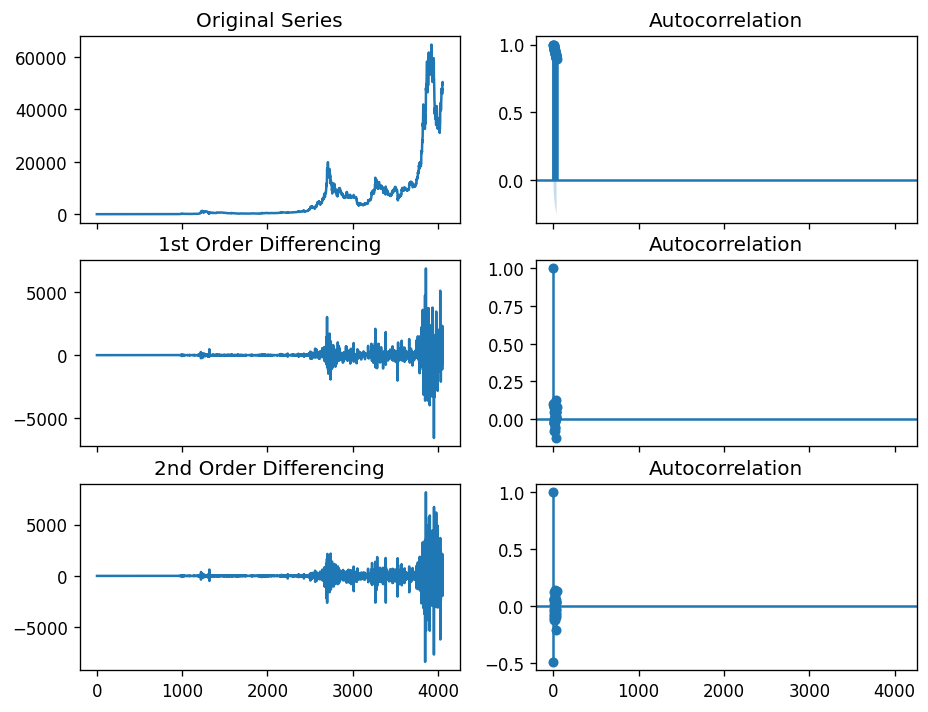

In [18]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})


# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(dataset.High); axes[0, 0].set_title('Original Series')
plot_acf(dataset.High, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(dataset.High.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(dataset.High.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(dataset.High.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(dataset.High.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

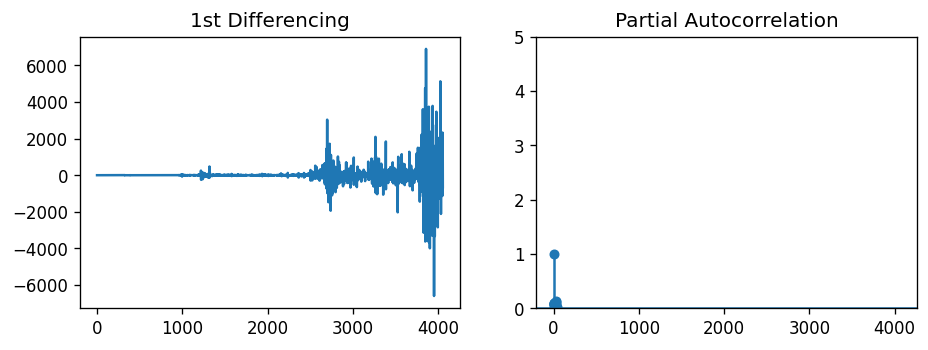

In [19]:
# PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(dataset.High.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(dataset.High.diff().dropna(), ax=axes[1])

plt.show()

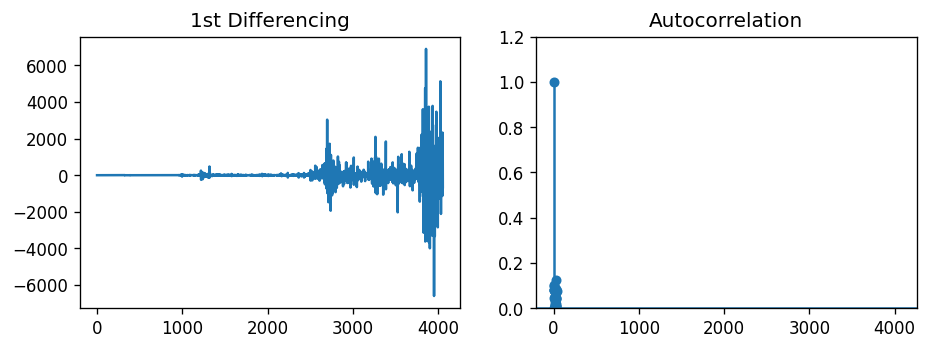

In [20]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(dataset.High.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(dataset.High.diff().dropna(), ax=axes[1])

plt.show()

In [21]:
from statsmodels.tsa.arima_model import ARIMA

# 1,1,2 ARIMA Model
model = ARIMA(dataset.High, order=(1,1,2))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                 D.High   No. Observations:                 4055
Model:                 ARIMA(1, 1, 2)   Log Likelihood              -30527.597
Method:                       css-mle   S.D. of innovations            450.085
Date:                Mon, 03 Jan 2022   AIC                          61065.194
Time:                        18:12:52   BIC                          61096.733
Sample:                             1   HQIC                         61076.366
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           12.2927      8.014      1.534      0.125      -3.415      28.000
ar.L1.D.High    -0.8556      0.045    -19.196      0.000      -0.943      -0.768
ma.L1.D.High     0.9574      0.046     20.79

In [22]:
# 1,1,1 ARIMA Model
model = ARIMA(dataset.High, order=(1,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                 D.High   No. Observations:                 4055
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -30545.925
Method:                       css-mle   S.D. of innovations            452.127
Date:                Mon, 03 Jan 2022   AIC                          61099.850
Time:                        18:12:53   BIC                          61125.081
Sample:                             1   HQIC                         61108.787
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           12.2930      9.149      1.344      0.179      -5.638      30.224
ar.L1.D.High     0.6954      0.077      9.005      0.000       0.544       0.847
ma.L1.D.High    -0.6075      0.085     -7.11

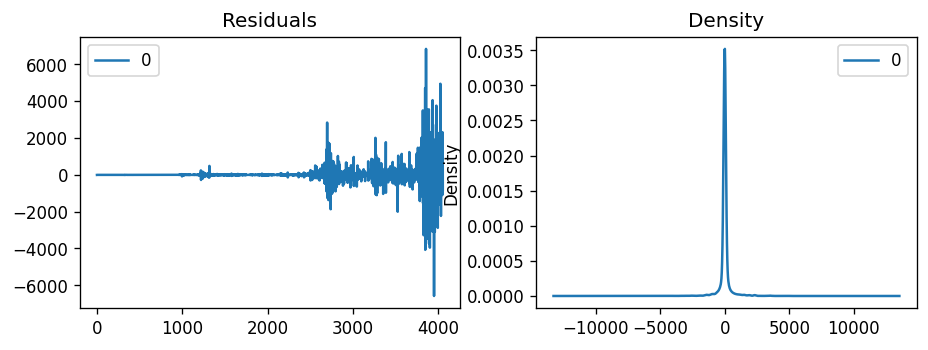

In [23]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

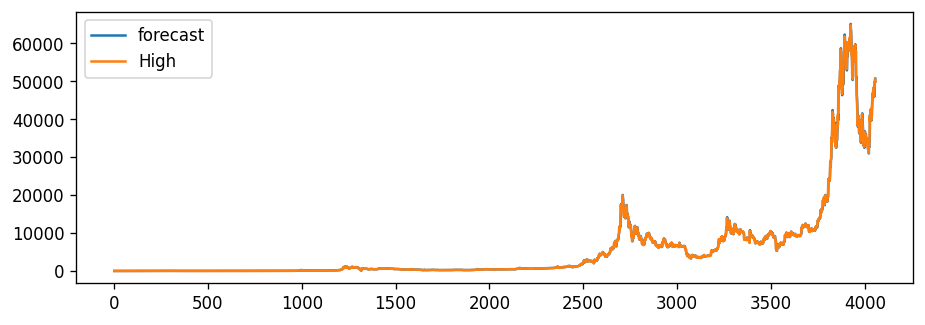

In [24]:
# Actual vs Fitted
model_fit.plot_predict(dynamic=False)
plt.show()

## Applying FBProphet

In [25]:
data = dataset[["Date","High"]]
data['Date'] = pd.to_datetime(data['Date'])
data = data.rename(columns = {"Date":"ds","High":"y"})
data.head()

ds    y
0 2010-07-18  0.1
1 2010-07-19  0.1
2 2010-07-20  0.1
3 2010-07-21  0.1
4 2010-07-22  0.1

In [26]:
from fbprophet import Prophet
m = Prophet(daily_seasonality = True) # the Prophet class (model)
m.fit(data) # fit the model using all data

Initial log joint probability = -243.476


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       8070.18     0.0549352       2068.75           1           1      126   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       8235.62    0.00677886       306.139           1           1      244   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       8280.63    0.00202424       199.372           1           1      368   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       8290.17    0.00135405       177.915       1.453      0.1453      486   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     435       8292.48   9.82402e-05       233.074   3.829e-07       0.001      574  LS failed, Hessian reset 
     499       8297.33   0.000413266       137.182      0.3672           1      6

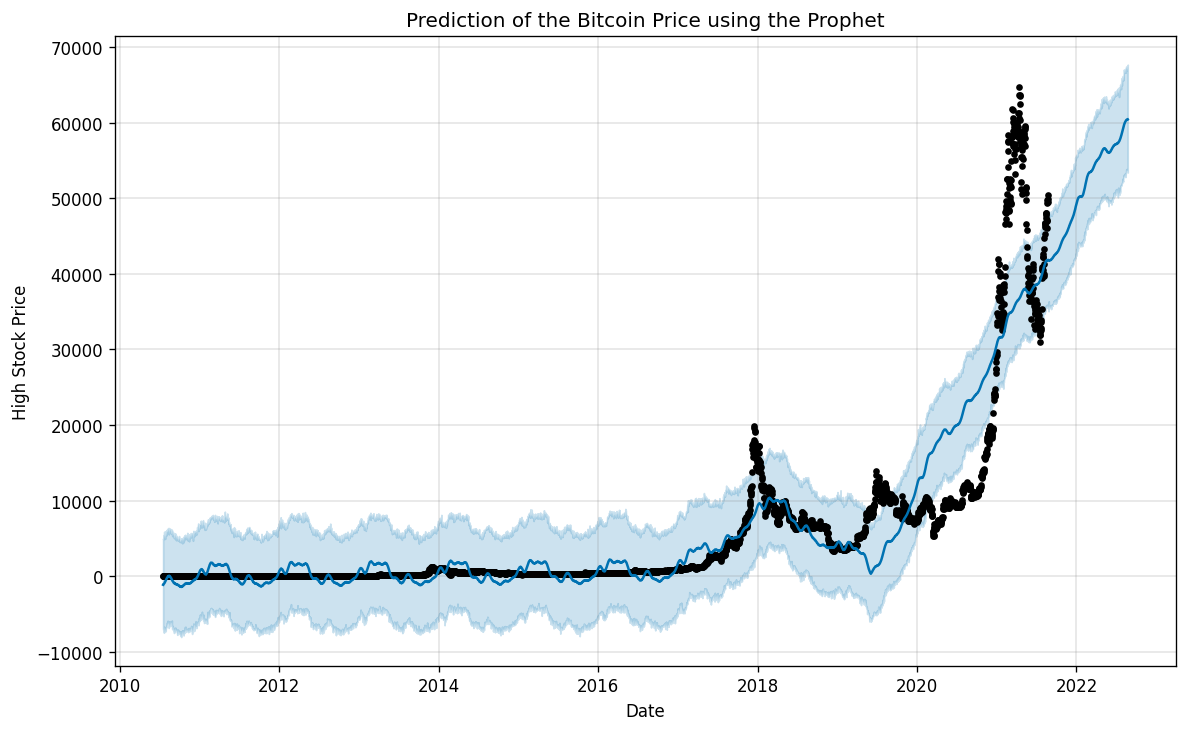

In [27]:
future = m.make_future_dataframe(periods = 365) #we need to specify the number of days in future
prediction = m.predict(future)
m.plot(prediction)
plt.title("Prediction of the Bitcoin Price using the Prophet")
plt.xlabel("Date")
plt.ylabel("High Stock Price")
plt.show()

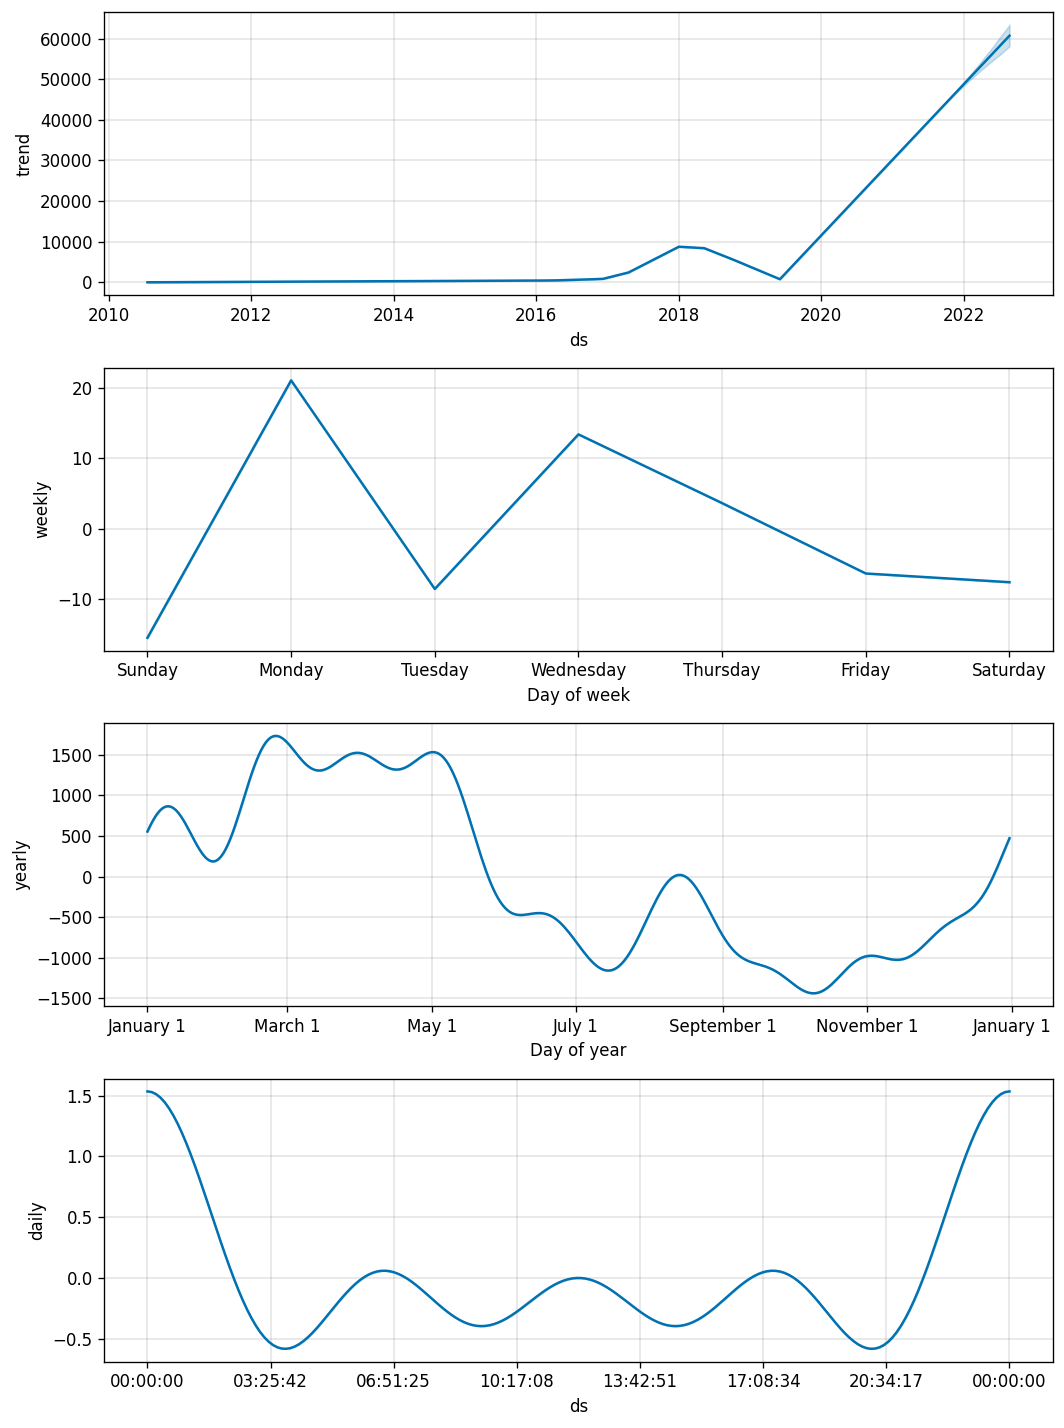

In [28]:
m.plot_components(prediction)
plt.show()

## Thank You.